In [3]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
#data after quality cuts

data = ascii.read("ngc5288_gaia_cutquality.csv") 

In [12]:
#data used in the analysis
pmra1 = data["pmra"]
pmde1 = data["pmdec"]
gmag1 = data["phot_g_mean_mag"]
plx1  = data["plx"] 
ra1   = data["ra"]
dec1  = data["dec"]

In [6]:
#data from simbad about the cluster
#the L_ value are an amount add to the limits of the quantities

pmra_cluster = -7.422
L_pmra       = 1.0
pmde_cluster = -5.534
L_pmde       = 1.0
plx_cluster  = 1.187
L_plx        = 0.3
RA_cluster   = 226.0510  
DEC_cluster  = -54.3660 

raio_dado=600. #arcsec

Because we don't know the radius of the cluster, we can make some estimates around the values of the SIMBAD. We bagin doing this in proper motion, taking some radius around the center of the cluster.

First, we take values $\pm 5$ of the values in SIMBAD. In the case of NGC 5822 we also do a filter in paralax.

In [7]:
#limiting the proper motion +-5 from SIMBAD values
kk, = np.where(((pmra > -12.42)& (pmra < -2.42))&((pmde > -10.53)&(pmde < -0.53))&(plx>0.5)&(plx<0.7))

In [8]:
#data with filters 
data_clu = data[kk]

In [13]:
#data used in the analysis
pmra2 = data_clu["pmra"]
pmde2 = data_clu["pmdec"]
gmag2 = data_clu["phot_g_mean_mag"]
plx2  = data_clu["plx"] 
ra2   = data_clu["ra"]
dec2  = data_clu["dec"]

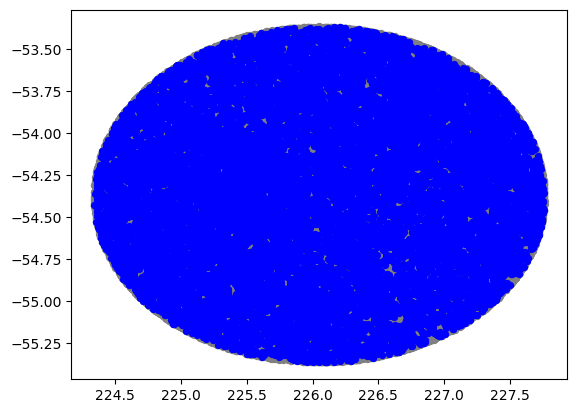

In [14]:
fig, ax = plt.subplots()
ax.scatter(ra1, dec1, color='gray', s=18)
ax.scatter(ra2, dec2,color = 'blue', s=18)

(-10.0, -0.5)

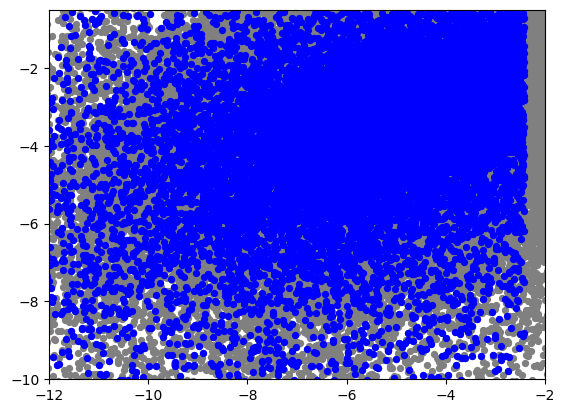

In [18]:
fig, ax = plt.subplots()
ax.scatter(pmra1, pmde1, color='gray', s=18)
ax.scatter(pmra2, pmde2,color = 'blue', s=18)
ax.set_xlim(-12, -2.0)
ax.set_ylim(-10, -0.5)

We absolutely do not see any specific overdensity. So we are analyzing better the second population that we choose. First, we can set some radius in proper motion that keeps getting small and test the population inside this radius.

In [ ]:
d = np.sqrt(pmra_cluster**2 + pmde_cluster**2)

In [58]:
rad1 = 4.
th  = np.linspace(0., 2*np.pi, 100)
x1_c = pmra_cluster + rad1*np.cos(th)
y1_c = pmde_cluster + rad1*np.sin(th)

rad2 = 3.
x2_c = pmra_cluster + rad2*np.cos(th)
y2_c = pmde_cluster + rad2*np.sin(th)

rad3 = 2.
x3_c = pmra_cluster + rad3*np.cos(th)
y3_c = pmde_cluster + rad3*np.sin(th)

rad4 = 1.
x4_c = pmra_cluster + rad4*np.cos(th)
y4_c = pmde_cluster + rad4*np.sin(th)

Text(0.5, 0, 'pmRA')

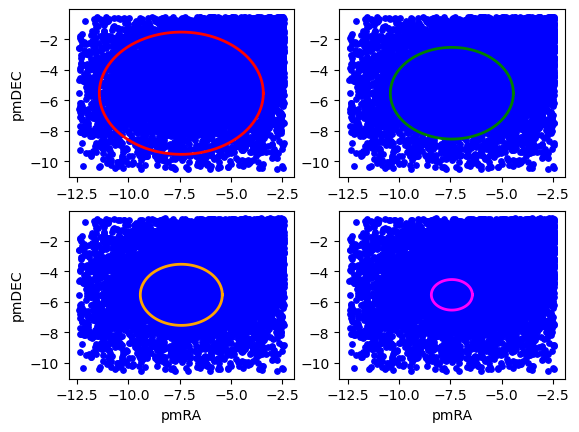

In [60]:
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(pmra2, pmde2,color = 'blue', s=15)
ax[0,0].plot(x1_c, y1_c,color='r', linewidth=2)
ax[0,0].set_ylabel("pmDEC")

ax[0,1].scatter(pmra2, pmde2,color = 'blue', s=15)
ax[0,1].plot(x2_c, y2_c,color='g', linewidth=2)

ax[1,0].scatter(pmra2, pmde2,color = 'blue', s=15)
ax[1,0].plot(x3_c, y3_c,color='orange', linewidth=2)
ax[1,0].set_ylabel("pmDEC")
ax[1,0].set_xlabel("pmRA")

ax[1,1].scatter(pmra2, pmde2,color = 'blue', s=15)
ax[1,1].plot(x4_c, y4_c,color='magenta', linewidth=2)
ax[1,1].set_xlabel("pmRA")


We can select the subpopulations that are in each circle and examine its other quantities. 

In [62]:
#Dividing the subpopulations
ii, = np.where(np.sqrt((pmra2 - pmra_cluster)**2 + (pmde2 - pmde_cluster)**2) < rad1)
jj, = np.where(np.sqrt((pmra2 - pmra_cluster)**2 + (pmde2 - pmde_cluster)**2) < rad2)
ll, = np.where(np.sqrt((pmra2 - pmra_cluster)**2 + (pmde2 - pmde_cluster)**2) < rad3)
nn, = np.where(np.sqrt((pmra2 - pmra_cluster)**2 + (pmde2 - pmde_cluster)**2) < rad4)

pop_rad1 = data_clu[ii]
pop_rad2 = data_clu[jj]
pop_rad3 = data_clu[ll]
pop_rad4 = data_clu[nn]

Text(0.5, 0, 'pmRA')

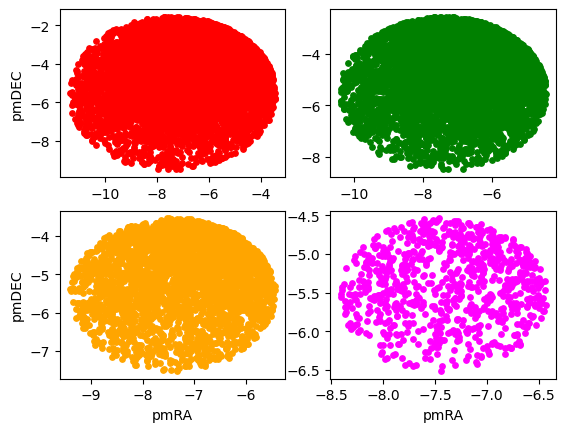

In [67]:
#fig, ax = plt.subplots(2,2,sharex=True,sharey=True)
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(pop_rad1["pmra"], pop_rad1["pmdec"],color = 'r', s=15)
#ax[0,0].plot(x1_c, y1_c,color='r', linewidth=2)
ax[0,0].set_ylabel("pmDEC")

ax[0,1].scatter(pop_rad2["pmra"], pop_rad2["pmdec"],color = 'g', s=15)
#ax[0,1].plot(x2_c, y2_c,color='g', linewidth=2)

ax[1,0].scatter(pop_rad3["pmra"], pop_rad3["pmdec"],color = 'orange', s=15)
#ax[1,0].plot(x3_c, y3_c,color='orange', linewidth=2)
ax[1,0].set_ylabel("pmDEC")
ax[1,0].set_xlabel("pmRA")

ax[1,1].scatter(pop_rad4["pmra"], pop_rad4["pmdec"],color = 'magenta', s=15)
#ax[1,1].plot(x4_c, y4_c,color='magenta', linewidth=2)
ax[1,1].set_xlabel("pmRA")


Now we can plot the other quantities and see how they change with the selected populations.

In [68]:
bprp1 = pop_rad1["phot_bp_mean_mag"] - pop_rad1["phot_rp_mean_mag"]
bprp2 = pop_rad2["phot_bp_mean_mag"] - pop_rad2["phot_rp_mean_mag"]
bprp3 = pop_rad3["phot_bp_mean_mag"] - pop_rad3["phot_rp_mean_mag"]
bprp4 = pop_rad4["phot_bp_mean_mag"] - pop_rad4["phot_rp_mean_mag"]

Text(0.5, 0, 'Bp - Rp')

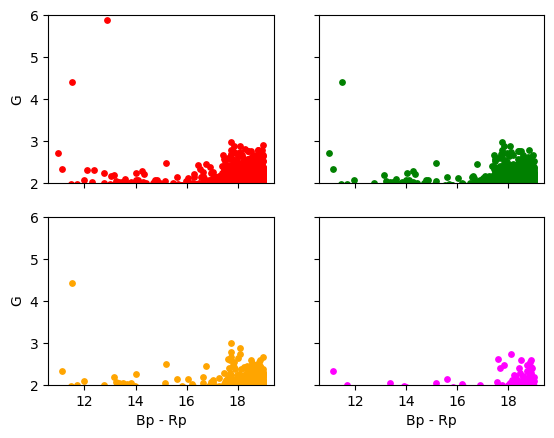

In [81]:
fig, ax = plt.subplots(2,2,sharex=True,sharey=True)
#fig, ax = plt.subplots(2,2)
ax[0,0].scatter(pop_rad1["phot_g_mean_mag"], bprp1,color = 'r', s=15)
#ax[0,0].plot(x1_c, y1_c,color='r', linewidth=2)
ax[0,0].set_ylabel("G")
ax[0,0].set_ylim(2,6)
#ax[0,0].set_xlim(0,5)

ax[0,1].scatter(pop_rad2["phot_g_mean_mag"], bprp2,color = 'g', s=15)
#ax[0,1].plot(x2_c, y2_c,color='g', linewidth=2)

ax[1,0].scatter(pop_rad3["phot_g_mean_mag"], bprp3,color = 'orange', s=15)
#ax[1,0].plot(x3_c, y3_c,color='orange', linewidth=2)
ax[1,0].set_ylabel("G")
ax[1,0].set_xlabel("Bp - Rp")

ax[1,1].scatter(pop_rad4["phot_g_mean_mag"], bprp4,color = 'magenta', s=15)
#ax[1,1].plot(x4_c, y4_c,color='magenta', linewidth=2)
ax[1,1].set_xlabel("Bp - Rp")
